In [38]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
from collections import namedtuple
import matplotlib.patches as patches
import networkx as nx

In [2]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

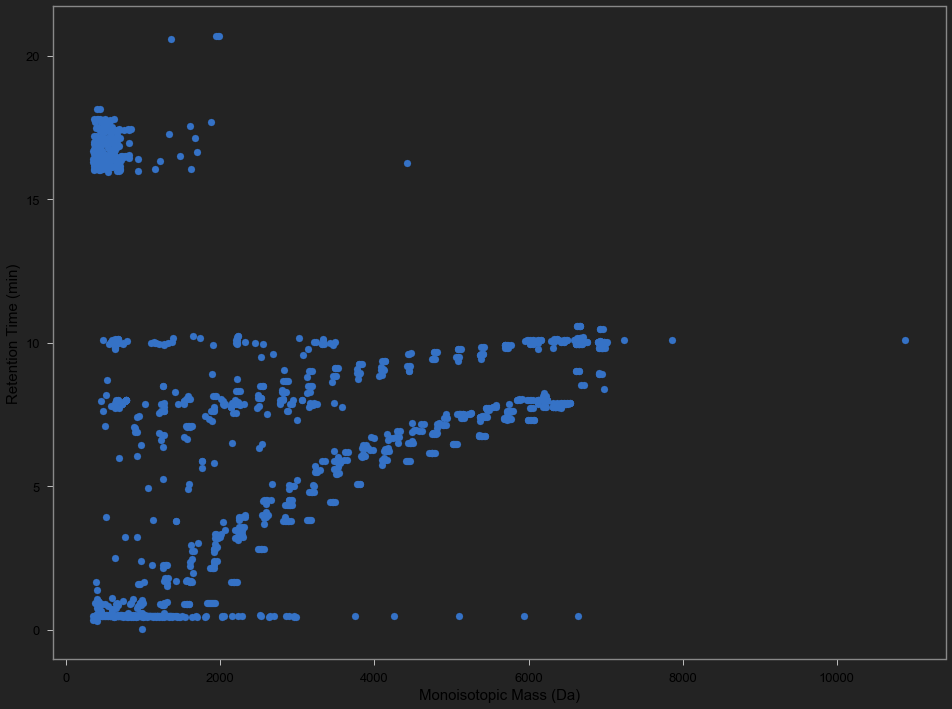

In [6]:
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/Ning1024/12mixtures/19-Table 1.csv')
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/Ning1024/12mixtures/30-Table 1.csv')
# df = pd.read_csv('/Users/bryan/Studio/lcmsseq/examples/compounds.csv', skiprows=2)
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/Ning1024/5mix_MFE.xlsx')
df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/Ning1024/2mix_180521s14_100.xls')
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/Ning1024/12mixtures/12mix.csv')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724_std.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/oligosdegradsample2-1.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/total_tRNA_acid_degradated_20to40_component_only.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/total_tRNA_acid_deg.xlsx')
# df = thermo_df(df)
# df = df[df.Mass < 20000]
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/PaperData/ACS/032919s07.xls')
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/PaperData/ACS/111418s05.xls')
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/PaperData/ACS/100918s06.xls')
df.shape
plot_zone(df)

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

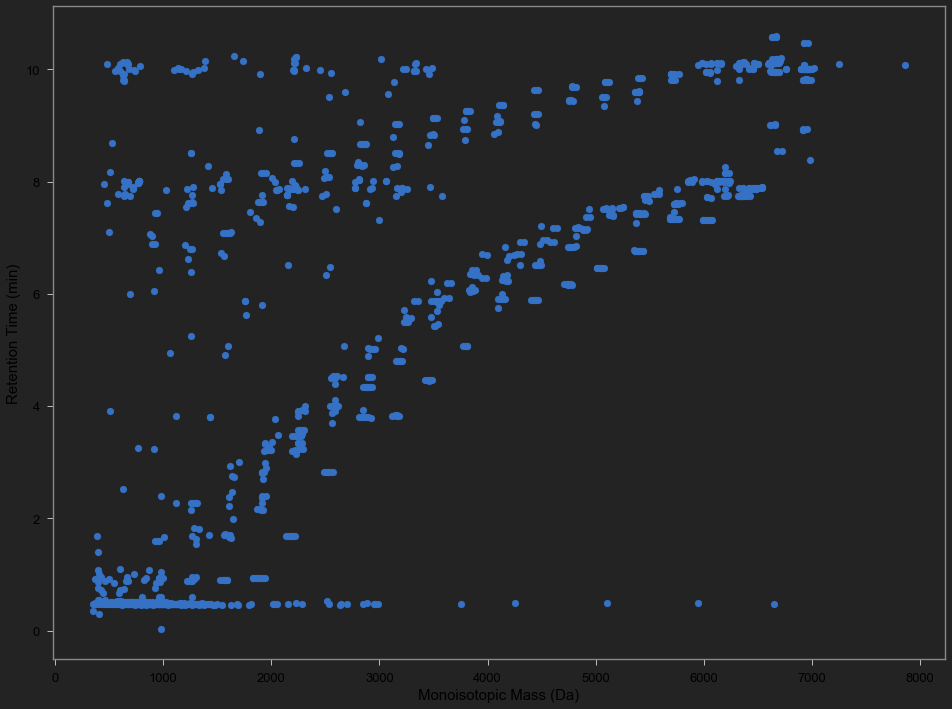

In [8]:
df_sample = df[(df.Mass < 8000) & (df.RT < 15)]
plot_zone(df_sample)

In [17]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, ..., #6371f2,
                   …

In [18]:
df_chosen = df_sample.iloc[idxs]
df_chosen.shape

(15, 23)

In [19]:
# df_hi = df_chosen
df_lo = df_chosen

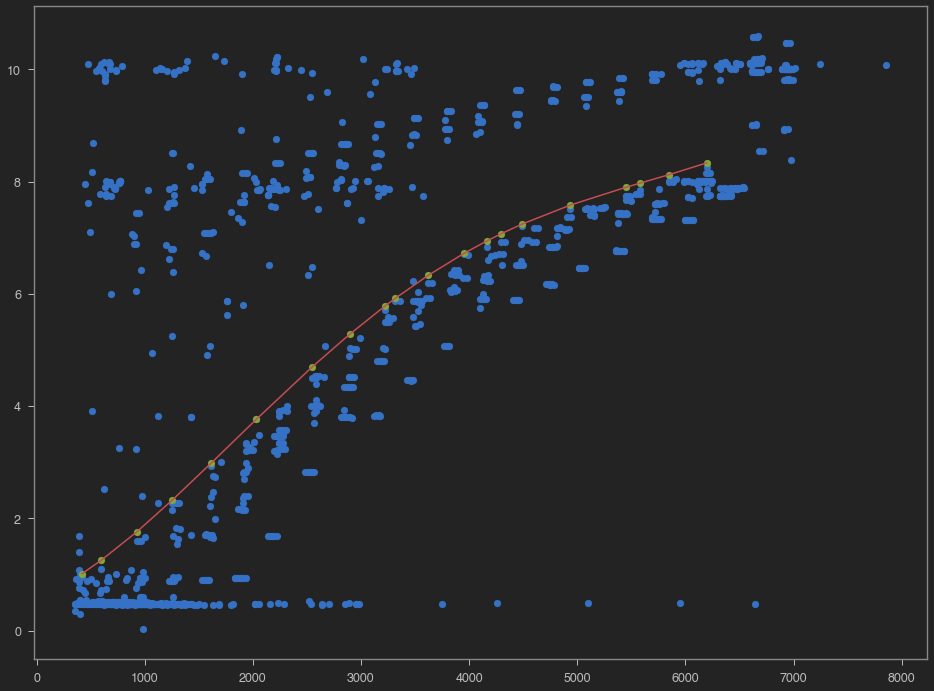

In [16]:
x = df_hi.Mass
y = df_hi.RT
z = np.polyfit(x, y, 4)
def f_hi2(x):
    return z[0] * x**4 + z[1]*x**3 + z[2]*x**2 + z[3]*x + z[4] + 0.1
y = f_hi2(x)
plt.figure(figsize=(16, 12))
plt.scatter(df_sample.Mass, df_sample.RT)
plt.plot(x, y, "r-")

plt.scatter(x, y)
plt.show()

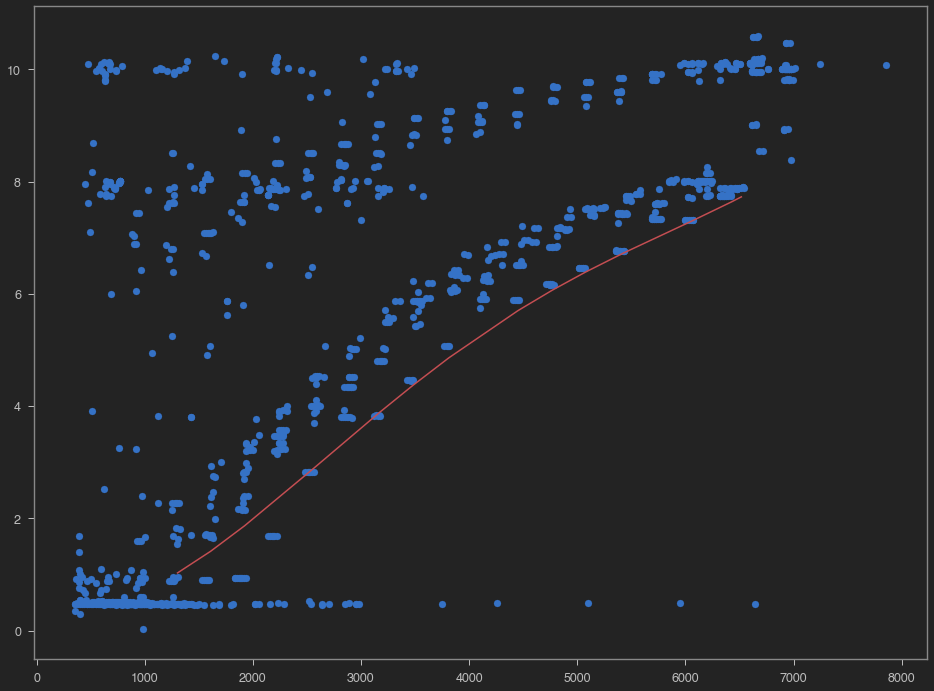

In [96]:
x = df_lo.Mass
y = df_lo.RT
z_lo = np.polyfit(x, y, 4)
def f_lo2(x):
    return z_lo[0] * x**4 + z_lo[1]*x**3 + z_lo[2]*x**2 + z_lo[3]*x + z_lo[4] - 0.1
#     return z_lo[0] * x**3 + z_lo[1]*x**2 + z_lo[2]*x + z_lo[3]
y = f_lo2(x)
plt.figure(figsize=(16, 12))
plt.scatter(df_sample.Mass, df_sample.RT)
plt.plot(x, y, "r-")
# plt.scatter(x, y)
plt.show()

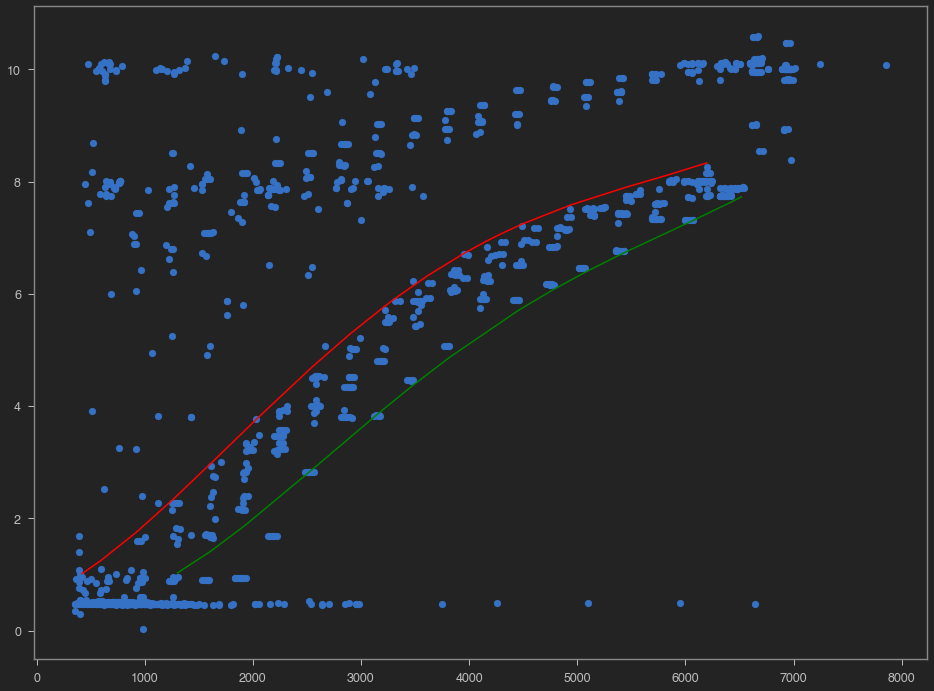

In [98]:
_, ax = plt.subplots(figsize=(16, 12))
ax.scatter(df_sample.Mass, df_sample.RT)

# ax.scatter(df_hi.Mass, df_hi.RT, c='red')
ax.plot(df_hi.Mass, f_hi2(df_hi.Mass), c='red')

# ax.scatter(df_lo.Mass, df_lo.RT, c='green')
ax.plot(df_lo.Mass, f_lo2(df_lo.Mass), c='green')

In [27]:
sample_rt_min = df_sample.RT.min()
sample_rt_max = df_sample.RT.max()

In [80]:
filter_min = 0.8
filter_nums = 3

def bin_range2(df, left, right, f_hi, f_lo, bin_num):
    rt = df.RT
    if rt.empty:
        return 0.0, 0.0
#     rt_min = rt.min()
#     rt_max = rt.max()
    rt_min = f_lo(left)
    rt_min = sample_rt_min if rt_min < sample_rt_min else rt_min
    rt_max = f_hi(right)
    rt_max = sample_rt_max if rt_max > sample_rt_max else rt_max
    rt_height = rt_max - rt_min
#     print(rt_min, rt_max, rt_height)
    
    bin_size = rt_height / filter_nums
    bin_size = filter_min if bin_size < filter_min else bin_size
    
    rt_hi = rt_max - bin_size * (bin_num - 1)
    rt_lo = rt_hi - bin_size
#     print(type(rt_lo), type(bin_size))
    if np.less(rt_lo, rt_min):
        print('Reach the last bin.')
        rt_lo = rt_min
        rt_hi = rt_lo + bin_size
    print('df_win count {} winRT {}-{} filterRT lo-hi {}-{}'.format(df.shape[0], rt_min, rt_max, rt_lo, rt_hi))
    return rt_lo, rt_hi

In [81]:
def create_rectangle(left, right, lo, hi):
    rect = patches.Rectangle((left, lo), right-left, hi-lo)
    return rect

Reach the last bin.
df_win count 16 winRT 0.4420407494633808-0.9395164812547198 filterRT lo-hi 0.4420407494633808-1.242040749463381
Reach the last bin.
df_win count 5 winRT 0.4415352574415854-0.9515799865052235 filterRT lo-hi 0.4415352574415854-1.2415352574415854
Reach the last bin.
df_win count 9 winRT 0.44120159707556494-0.9637456527477497 filterRT lo-hi 0.44120159707556494-1.241201597075565
Reach the last bin.
df_win count 9 winRT 0.4410387064103527-0.9760125688035547 filterRT lo-hi 0.4410387064103527-1.2410387064103527
Reach the last bin.
df_win count 18 winRT 0.441045526219744-0.9883798262147523 filterRT lo-hi 0.441045526219744-1.241045526219744
Reach the last bin.
df_win count 12 winRT 0.44122100000629516-1.000846519244314 filterRT lo-hi 0.44122100000629516-1.2412210000062953
Reach the last bin.
df_win count 11 winRT 0.44156407400132414-1.0134117448760673 filterRT lo-hi 0.44156407400132414-1.241564074001324
Reach the last bin.
df_win count 9 winRT 0.44207369716491074-1.0260746028

Reach the last bin.
df_win count 6 winRT 0.7052361098600333-1.8644746298759753 filterRT lo-hi 0.7052361098600333-1.5052361098600333
Reach the last bin.
df_win count 5 winRT 0.7135903759502018-1.881302793504764 filterRT lo-hi 0.7135903759502018-1.5135903759502018
Reach the last bin.
df_win count 3 winRT 0.7220548998044539-1.8981810276991773 filterRT lo-hi 0.7220548998044539-1.5220548998044539
Reach the last bin.
df_win count 3 winRT 0.7306287913797977-1.9151085926944855 filterRT lo-hi 0.7306287913797977-1.5306287913797978
Reach the last bin.
df_win count 4 winRT 0.739311163362002-1.932084751446817 filterRT lo-hi 0.739311163362002-1.539311163362002
Reach the last bin.
df_win count 3 winRT 0.7481011311655971-1.949108769633158 filterRT lo-hi 0.7481011311655971-1.548101131165597
Reach the last bin.
df_win count 2 winRT 0.7569978129338756-1.966179915651351 filterRT lo-hi 0.7569978129338756-1.5569978129338757
Reach the last bin.
df_win count 4 winRT 0.766000329538891-1.9832974606200966 filter

Reach the last bin.
df_win count 1 winRT 1.5382872718209752-3.1627623992962777 filterRT lo-hi 1.5382872718209752-2.3382872718209753
Reach the last bin.
df_win count 1 winRT 1.5809878820511865-3.218887174402443 filterRT lo-hi 1.5809878820511865-2.3809878820511865
Reach the last bin.
df_win count 2 winRT 1.6097149363288041-3.256317982635383 filterRT lo-hi 1.6097149363288041-2.409714936328804
Reach the last bin.
df_win count 1 winRT 1.6241543933609306-3.275036058936651 filterRT lo-hi 1.6241543933609306-2.4241543933609306
Reach the last bin.
df_win count 2 winRT 1.6677683003314374-3.331194588987393 filterRT lo-hi 1.6677683003314374-2.4677683003314375
Reach the last bin.
df_win count 1 winRT 1.697083753032826-3.3686319247339407 filterRT lo-hi 1.697083753032826-2.4970837530328263
Reach the last bin.
df_win count 2 winRT 1.7265845542854847-3.4060630465020294 filterRT lo-hi 1.7265845542854847-2.526584554285485
Reach the last bin.
df_win count 2 winRT 1.7562653847280607-3.443483831939693 filter

Reach the last bin.
df_win count 4 winRT 4.33849248986091-6.1320514581259316 filterRT lo-hi 4.33849248986091-5.1384924898609095
Reach the last bin.
df_win count 4 winRT 4.353783718248374-6.145473030314148 filterRT lo-hi 4.353783718248374-5.1537837182483734
Reach the last bin.
df_win count 2 winRT 4.369048050244829-6.1588445458347785 filterRT lo-hi 4.369048050244829-5.169048050244829
Reach the last bin.
df_win count 3 winRT 4.384285272540129-6.172165939695723 filterRT lo-hi 4.384285272540129-5.184285272540129
Reach the last bin.
df_win count 4 winRT 4.399495174552892-6.185437149625733 filterRT lo-hi 4.399495174552892-5.199495174552892
Reach the last bin.
df_win count 2 winRT 4.4146775484305065-6.198658116074431 filterRT lo-hi 4.4146775484305065-5.214677548430506
Reach the last bin.
df_win count 5 winRT 4.429832189049107-6.211828782212282 filterRT lo-hi 4.429832189049107-5.229832189049107
Reach the last bin.
df_win count 1 winRT 4.444958894013603-6.224949093930617 filterRT lo-hi 4.444958

Reach the last bin.
df_win count 3 winRT 6.692636488548771-7.8707536588635225 filterRT lo-hi 6.692636488548771-7.49263648854877
Reach the last bin.
df_win count 3 winRT 6.702003393876844-7.87651968745653 filterRT lo-hi 6.702003393876844-7.502003393876844
Reach the last bin.
df_win count 5 winRT 6.711352792449438-7.88227352795192 filterRT lo-hi 6.711352792449438-7.511352792449438
Reach the last bin.
df_win count 1 winRT 6.720684997607386-7.888015640483057 filterRT lo-hi 6.720684997607386-7.520684997607386
Reach the last bin.
df_win count 3 winRT 6.730000325420259-7.893746487904187 filterRT lo-hi 6.730000325420259-7.530000325420259
Reach the last bin.
df_win count 2 winRT 6.739299094686424-7.8994665357903795 filterRT lo-hi 6.739299094686424-7.539299094686424
Reach the last bin.
df_win count 3 winRT 6.748581626932977-7.905176252437589 filterRT lo-hi 6.748581626932977-7.548581626932977
Reach the last bin.
df_win count 1 winRT 6.767099280119531-7.916566578803123 filterRT lo-hi 6.76709928011

Reach the last bin.
df_win count 1 winRT 9.643625716587758-10.454813659177107 filterRT lo-hi 9.643625716587758-10.443625716587759


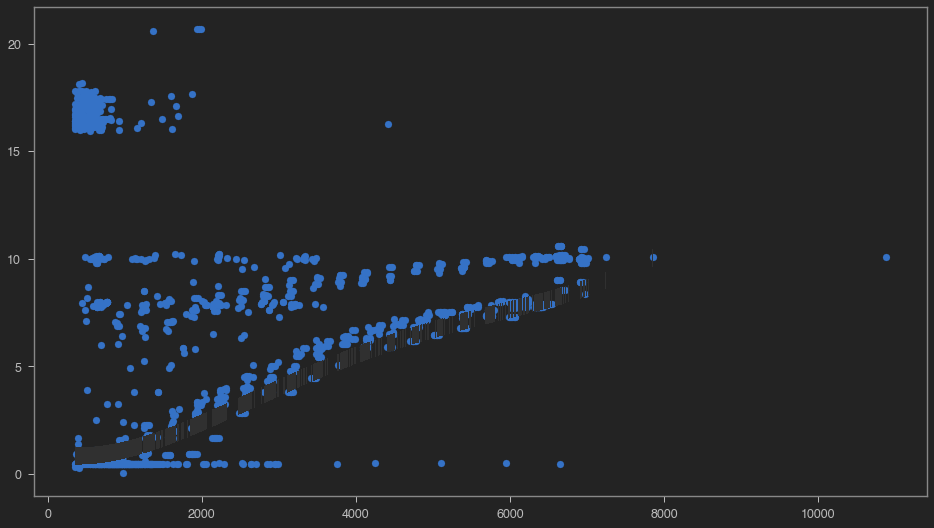

In [92]:
cursor = 0
mass_win_size = 10
bin_num = 3
last_rt_lo = 0.0

# plt.figure(figsize=(16, 9))
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.scatter(df.Mass, df.RT)
filters = list()
while cursor < df_sample.Mass.max():
    # do sth
#     print('processing win {}-{}'.format(cursor, cursor+mass_win_size))
    df_win = df[(df.Mass >= cursor) & (df.Mass < cursor + mass_win_size)]
    rt_lo, rt_hi = bin_range2(df_win, cursor, cursor+mass_win_size, f_hi2, f_lo2, bin_num)
    if rt_lo < last_rt_lo:
        rt_lo = last_rt_lo
        if rt_lo >= rt_hi:
            cursor += mass_win_size
            continue
            
    if np.isclose(rt_lo, 0.0) or np.isclose(rt_hi, 0.0):
        cursor += mass_win_size
        continue
    
    rect = create_rectangle(cursor, cursor+mass_win_size, rt_lo, rt_hi)
    ax.add_patch(rect)
    
    last_rt_lo = rt_lo
    df_filter = df_win[(df_win.RT>=rt_lo) & (df_win.RT<=rt_hi)]
#     print(cursor, df_filter.shape)
    filters.append(df_filter)
    cursor += mass_win_size

plt.show()

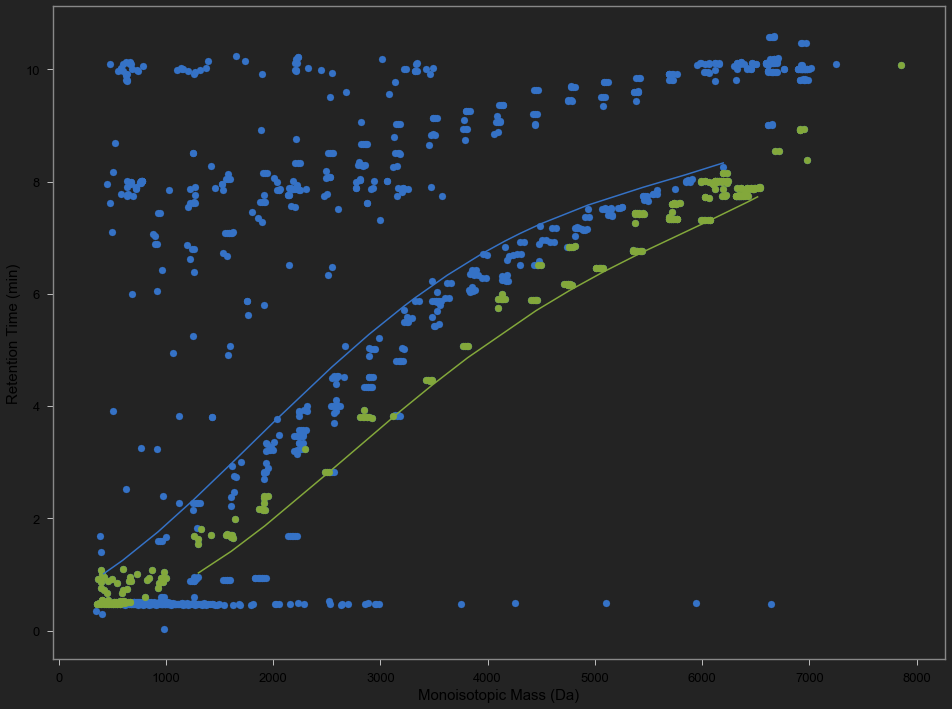

In [93]:
df_filters = pd.concat(filters)
plt = plot_zones(df_sample, df_filters)
plt.plot(df_hi.Mass, f_hi2(df_hi.Mass))
plt.plot(df_lo.Mass, f_lo2(df_lo.Mass))
# plt.savefig('/Users/bryan/Documents/Presentations/Jan 12 2021/filter_{}_bin_{}_filters_{}.png'.format(filter_min, bin_num, filter_nums), transparent=True)

mass_x (292,) mass_y (292,)
df3_idxs 36 df5_idxs 35
df3_idxs 33 df5_idxs 30
df3_idxs 29 df5_idxs 28
df3_idxs 26 df5_idxs 24
df3_idxs 4 df5_idxs 4
df3_idxs 4 df5_idxs 4
df3_idxs 2 df5_idxs 2
df3_idxs 7 df5_idxs 8


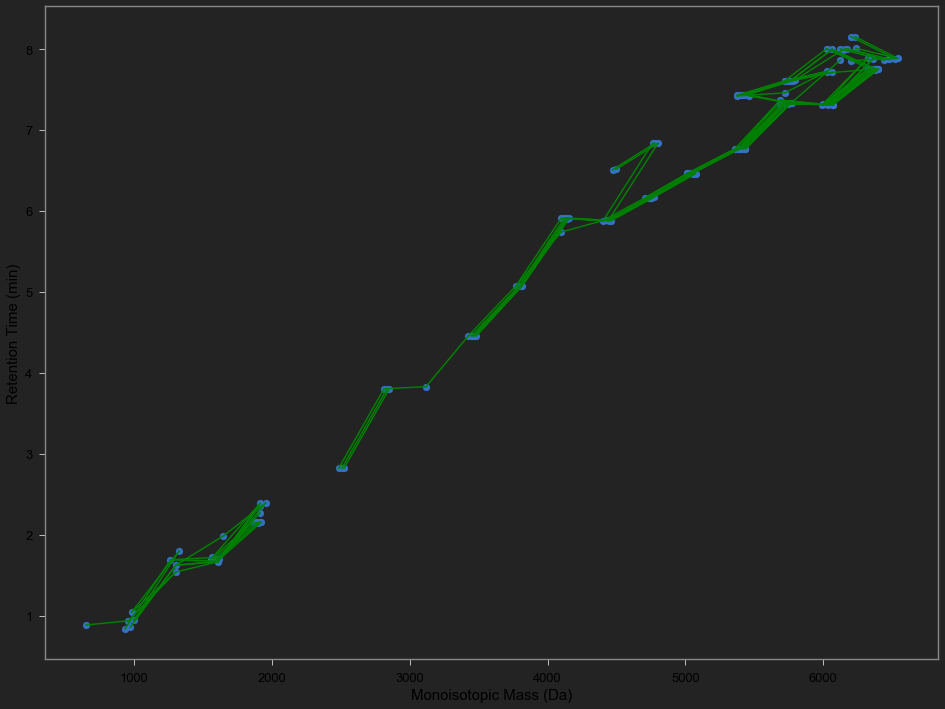

In [94]:
bcr_5p = base_calling_random(df_filters)
plt, _ = plot_basecalling(*bcr_5p, annotate=False)
# plt.savefig('/Users/bryan/Documents/Presentations/Jan 12 2021/filter_bc_{}_bin_{}_filters_{}.png'.format(filter_min, bin_num, filter_nums), transparent=True)

In [95]:
G = nx.DiGraph()

df_bcr = bcr_5p[0]
mass_pairs = bcr_5p[1]
for t in mass_pairs:
    G.add_edge(t[1], t[0], base=t[-1])

path = longest_path(G)
seqs = [G.edges[path[i], path[i+1]]['base'] for i in range(len(path)-1)]
print('longest sequence: ' + ''.join(seqs))
print(path)

longest sequence: ACUGACCCGAAU
[2484.3565, 2813.408, 3118.4442, 3424.4687, 3769.5112, 4098.5636, 4403.6036, 4708.6422, 5013.677, 5358.7393, 5687.7721, 6016.7871, 6322.8399]


In [40]:
def longest_path(G):
    dist = {} # stores [node, distance] pair
    for node in nx.topological_sort(G):
        # pairs of dist,node for all incoming edges
        pairs = [(dist[v][0]+1,v) for v in G.pred[node]] 
        if pairs:
            dist[node] = max(pairs)
        else:
            dist[node] = (0, node)
    node,(length,_)  = max(dist.items(), key=lambda x:x[1])
    path = []
    while length > 0:
        path.append(node)
        length,node = dist[node]
    return list(reversed(path))